In [2]:
#Імпорт необхідних бібліотек
import numpy as nmp
import pandas as pnd
import matplotlib.pyplot as ppl
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 223, 223, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 221, 221, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 

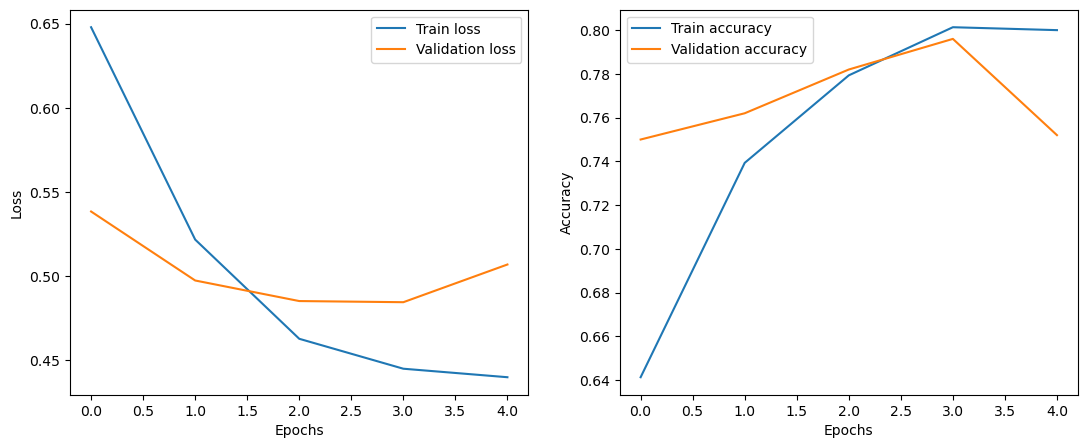

In [4]:
tf.random.set_seed(13)
clas = ['ice_cream', 'steak']
traindat = idg(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
testdat = idg(rescale=1/255.)
traindata = traindat.flow_from_directory('10_food_classes_all_data/train/', target_size=(225, 225), batch_size=32, class_mode='binary', seed=13, classes=clas)
testdata = testdat.flow_from_directory('10_food_classes_all_data/test/', target_size=(225, 225), batch_size=32, class_mode='binary', seed=13, classes=clas)
mdl = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(225, 225, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
mdl.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
mdl.summary()
hist = mdl.fit(traindata, epochs=5, steps_per_epoch=len(traindata), validation_data=testdata, validation_steps=len(testdata))
ppl.figure(figsize=(13, 5))
ppl.subplot(1, 2, 1)
ppl.plot(range(len(hist.history['loss'])), hist.history['loss'], label='Train loss')
ppl.plot(range(len(hist.history['loss'])), hist.history['val_loss'], label='Validation loss')
ppl.xlabel('Epochs')
ppl.ylabel('Loss')
ppl.legend()
ppl.subplot(1, 2, 2)
ppl.plot(range(len(hist.history['loss'])), hist.history['accuracy'], label='Train accuracy')
ppl.plot(range(len(hist.history['loss'])), hist.history['val_accuracy'], label='Validation accuracy')
ppl.xlabel('Epochs')
ppl.ylabel('Accuracy')
ppl.legend()
ppl.show(close=None, block=None)